# Projet Morpion

In [1]:
# Importation de notre classe Morpion depuis le fichier morpion.py
# Cette classe contient l'impl√©mentation du jeu de base
from morpion import Morpion

# Matplotlib : biblioth√®que de visualisation pour cr√©er des graphiques
# Nous l'utiliserons pour visualiser l'apprentissage de l'IA
import matplotlib.pyplot as plt

# NumPy : biblioth√®que pour le calcul scientifique
# Utilis√©e pour les op√©rations math√©matiques et la manipulation de tableaux
import numpy as np

# Module random pour g√©n√©rer des nombres al√©atoires
# Utilis√© pour l'exploration dans l'algorithme de Q-Learning
import random

# IPython.display : module pour contr√¥ler l'affichage dans Jupyter
# clear_output permet d'effacer la sortie pr√©c√©dente pour une meilleure visualisation
from IPython.display import clear_output

In [2]:
# Cr√©ation d'une nouvelle instance du jeu
game = Morpion()

# L'IA (joueur 1) joue en position 1 (case en haut √† gauche)
game.jouer_coup(1, 1)  # Placera un 'O'

# Le joueur humain (joueur 2) joue en position 2 (case en haut au milieu)
game.jouer_coup(2, 2)  # Placera un 'X'

# Affichage de l'√©tat actuel du plateau
game.afficher_plateau()

|     |     
  O  |  X  |  3
_____|_____|_____
     |     |     
  4  |  5  |  6
_____|_____|_____
     |     |     
  7  |  8  |  9
     |     |

In [3]:
def choisir_coup(coups_possibles, etat_actuel, etats_et_valeurs, epsilon=0.5):
    """
    S√©lectionne le prochain coup en utilisant la strat√©gie epsilon-greedy du Q-Learning.

    Cette fonction impl√©mente le compromis exploration/exploitation :
    - Exploration (probabilit√© epsilon) : choisit un coup au hasard pour d√©couvrir de nouvelles strat√©gies
    - Exploitation (probabilit√© 1-epsilon) : choisit le coup avec la plus grande valeur connue

    Arguments:
    -----------
    coups_possibles : list
        Liste des coups qui peuvent √™tre jou√©s
    etat_actuel : list
        Vecteur repr√©sentant l'√©tat actuel du jeu
    etats_et_valeurs : dict
        Dictionnaire contenant les valeurs associ√©es √† chaque √©tat d√©j√† rencontr√©
    epsilon : float, optionnel (d√©faut=0.1)
        Probabilit√© d'explorer (choisir un coup al√©atoire)

    Retourne:
    -----------
    action : int
        Le coup choisi √† jouer
    """
    # D√©cision d'explorer ou d'exploiter
    # exploitation = 0 : on explore (probabilit√© epsilon)
    # exploitation = 1 : on exploite (probabilit√© 1-epsilon)
    exploitation = np.random.choice([0, 1], p=[epsilon, 1 - epsilon])

    if exploitation == 0:
        # EXPLORATION : On choisit un coup au hasard parmi les coups possibles
        action = np.random.choice(coups_possibles)

    else:
        # EXPLOITATION : On cherche le coup qui maximise la valeur selon l'exp√©rience pass√©e

        # Initialisation de la valeur maximale
        meilleure_valeur = -999

        # On √©value chaque coup possible
        for coup in coups_possibles:
            # Copie de l'√©tat actuel pour simulation
            etat_test = etat_actuel.copy()
            # Ajout du coup potentiel √† l'√©tat
            etat_test.append(coup)

            # V√©rification si cet √©tat a d√©j√† √©t√© rencontr√©
            if tuple(etat_test) in etats_et_valeurs.keys():
                # Si oui, on r√©cup√®re sa valeur
                valeur = etats_et_valeurs[tuple(etat_test)]
            else:
                # Si non, on initialise sa valeur √† 0
                valeur = 0

            # Si ce coup m√®ne √† une meilleure valeur que ce qu'on a trouv√© jusqu'ici
            if valeur > meilleure_valeur:
                # On le garde comme meilleur coup
                action = coup
                meilleure_valeur = valeur

            # On retire le coup test√© de l'√©tat avant de tester le suivant
            etat_test.remove(coup)

    return action

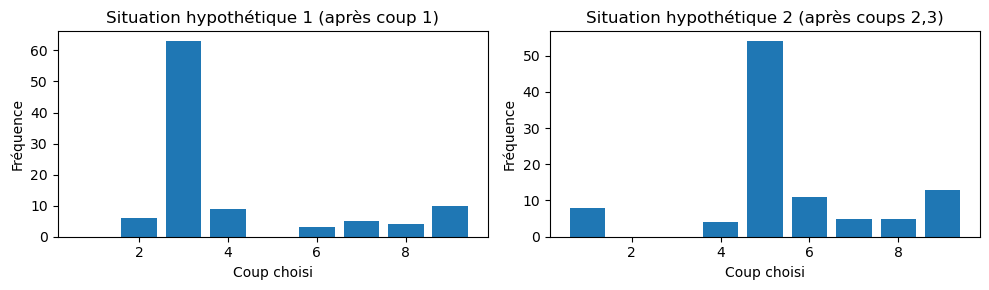

In [4]:
# Cr√©ation d'un dictionnaire d'√©tats et leurs valeurs associ√©es
# Chaque cl√© repr√©sente un √©tat du jeu sous forme de tuple, et chaque valeur est une estimation de la r√©compense attendue pour cet √©tat.
etats_et_valeurs = {
    (1): 0.1,          # √âtat apr√®s le coup 1 : faible valeur estim√©e
    (1, 5, 9): 0.02,   # √âtat apr√®s les coups 1, 5 puis 9 : faible valeur estim√©e
    (1, 5, 3): 0.4,    # √âtat apr√®s les coups 1, 5 puis 3 : valeur haute estim√©e
    (2): 0.1,          # √âtat apr√®s le coup 2 : faible valeur estim√©e
    (2, 3, 1): 0.2,    # √âtat apr√®s les coups 2, 3, puis 1 : faible valeur estim√©e
    (2, 3, 5): 0.5,    # √âtat apr√®s les coups 2, 3, puis 9 : bonne valeur estim√©e
}

# Test de la Situation Hypoth√©tique 1
# ----------------------------------
# On simule une situation o√π le coup 1 a d√©j√† √©t√© jou√©, et on observe quel coup l'agent choisit ensuite.

# √âtat initial : coup 1 d√©j√† jou√©
etat_actuel_1 = [1, 5]

# Coups encore disponibles sur le plateau
coups_possibles_1 = [2, 3, 4, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
# Cela permet de visualiser le compromis exploration/exploitation en action.
coups_choisis_1 = []
for i in range(100):
    coups_choisis_1.append(choisir_coup(coups_possibles_1, etat_actuel_1, etats_et_valeurs))

# Test de la Situation Hypoth√©tique 2
# ----------------------------------
# On simule une situation o√π les coups 2 puis 3 ont d√©j√† √©t√© jou√©s, et on observe quel coup l'agent choisit ensuite.

# √âtat initial : coups 2 puis 3 d√©j√† jou√©s
etat_actuel_2 = [2, 3]

# Coups encore disponibles sur le plateau
coups_possibles_2 = [1, 4, 5, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
coups_choisis_2 = []
for i in range(100):
    coups_choisis_2.append(choisir_coup(coups_possibles_2, etat_actuel_2, etats_et_valeurs))

# Visualisation des r√©sultats avec deux histogrammes
# ------------------------------------------------
# On cr√©e deux histogrammes pour comparer les choix de l'agent dans les deux situations hypoth√©tiques.

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Histogramme pour la situation 1
axes[0].hist(coups_choisis_1, bins=range(1, 11), align='left', rwidth=0.8)
axes[0].set_title('Situation hypoth√©tique 1 (apr√®s coup 1)')
axes[0].set_xlabel('Coup choisi')
axes[0].set_ylabel('Fr√©quence')

# Histogramme pour la situation 2
axes[1].hist(coups_choisis_2, bins=range(1, 11), align='left', rwidth=0.8)
axes[1].set_title('Situation hypoth√©tique 2 (apr√®s coups 2,3)')
axes[1].set_xlabel('Coup choisi')
axes[1].set_ylabel('Fr√©quence')

# Ajustement de la disposition pour √©viter les chevauchements
plt.tight_layout()

# Affichage des histogrammes
plt.show()

In [5]:
def attribuer_recompense(etats_et_valeurs, etats, recompense, taux_apprentissage=0.5, facteur_reduction=0.9):
    """
    Met √† jour les valeurs associ√©es √† chaque √©tat en fonction de la r√©compense obtenue.
    Cette fonction impl√©mente un processus de r√©tropropagation des r√©compenses,
    parcourant les √©tats de la fin vers le d√©but pour mettre √† jour leurs valeurs
    en fonction du r√©sultat final de la partie.

    Arguments:
    -----------
    etats_et_valeurs : dict
        Dictionnaire stockant les valeurs de chaque √©tat rencontr√© au cours des parties.
        Les cl√©s sont des tuples repr√©sentant les √©tats, et les valeurs sont les r√©compenses cumul√©es associ√©es.
    etats : list
        Liste des √©tats travers√©s pendant la partie (chaque √©tat est une s√©quence de coups jou√©s).
    recompense : float
        Valeur de r√©compense finale obtenue √† la fin de la partie :
        - Positive si le joueur a gagn√©.
        - N√©gative si le joueur a perdu.
        - Nulle si la partie s'est termin√©e par un match nul.
    taux_apprentissage : float, optionnel (d√©faut=0.5)
        Alpha (Œ±) : Contr√¥le la vitesse d'apprentissage.
        Une valeur √©lev√©e signifie que l'agent mettra plus de poids sur les nouvelles informations,
        tandis qu'une valeur basse favorise la conservation des connaissances ant√©rieures.
    facteur_reduction : float, optionnel (d√©faut=0.9)
        Gamma (Œ≥) : Diminue l'importance des r√©compenses √©loign√©es.
        Cela permet de donner plus de poids aux r√©compenses imm√©diates qu'√† celles √©loign√©es dans le temps.

    Retourne:
    -----------
    dict
        Le dictionnaire `etats_et_valeurs` mis √† jour avec les nouvelles valeurs associ√©es aux √©tats.

    Formule utilis√©e:
    ----------------
    nouvelle_valeur = ancienne_valeur + Œ± * (Œ≥ * r√©compense - ancienne_valeur)
    o√π:
    - Œ± (taux_apprentissage) contr√¥le l'importance des nouvelles informations.
    - Œ≥ (facteur_reduction) diminue l'importance des √©tats plus anciens.
    """

    # On parcourt les √©tats en sens inverse (de la fin vers le d√©but) pour propager la r√©compense.
    for etat in reversed(etats):
        # Conversion de l'√©tat en tuple pour pouvoir l'utiliser comme cl√© dans le dictionnaire.
        etat_tuple = tuple(etat)

        # Si cet √©tat a d√©j√† √©t√© rencontr√© dans le dictionnaire :
        if etat_tuple in etats_et_valeurs.keys():
            # Mise √† jour de sa valeur selon la formule du Q-Learning.
            # La nouvelle valeur est calcul√©e en combinant l'ancienne valeur et la r√©compense ajust√©e.
            etats_et_valeurs[etat_tuple] += taux_apprentissage * (
                facteur_reduction * recompense - etats_et_valeurs[etat_tuple]
            )

        # Si c'est un nouvel √©tat (non pr√©sent dans le dictionnaire) et que ce n'est pas le dernier √©tat :
        elif etat != etats[-1]:
            # Initialisation de la valeur pour ce nouvel √©tat.
            # On utilise une estimation bas√©e sur la r√©compense imm√©diate ajust√©e.
            etats_et_valeurs[etat_tuple] = taux_apprentissage * facteur_reduction * recompense

        # Si c'est c'est l'√©tat de fin de partie
        else:
            # On affecte la r√©compense finale
            etats_et_valeurs[etat_tuple] = recompense

        # Propagation de la r√©compense :
        # La r√©compense pour l'√©tat suivant devient la valeur actuelle de l'√©tat courant.
        # Cela permet de r√©tropropager les r√©compenses √† travers les √©tats pr√©c√©dents.
        recompense = etats_et_valeurs[etat_tuple]

    # Retour du dictionnaire mis √† jour.
    return etats_et_valeurs

In [6]:
# Param√®tres de test
etats = [
    [1],          # Joueur 1 joue le coup 1
    [1, 5],       # Joueur 2 joue le coup 5
    [1, 5, 3],    # Joueur 1 joue le coup 3
    [1, 5, 3, 7], # Joueur 2 joue le coup 7
    [1, 5, 3, 7, 2]  # Joueur 1 joue le coup 2 (victoire)
]

etats_et_valeurs = {
    (1,): 0.0,
    (1, 5): 0.0,
    (1, 5, 3): 0.0,
    (1, 5, 3, 7): 0.0
}

recompense_finale = 1.0  # Le joueur 1 a gagn√©

print("Valeurs avant mise √† jour :")
for etat, valeur in etats_et_valeurs.items():
    print(f"√âtat {list(etat)} : {valeur:.3f}")

# Mise √† jour des valeurs avec la fonction existante
nouvelles_valeurs = attribuer_recompense(
    etats_et_valeurs, etats, recompense_finale, taux_apprentissage=0.5, facteur_reduction=0.9
)

# Affichage des r√©sultats
print("Valeurs mises √† jour des √©tats :")
for etat, valeur in nouvelles_valeurs.items():
    print(f"√âtat {list(etat)} : {valeur:.3f}")

Valeurs avant mise √† jour :
√âtat [1] : 0.000
√âtat [1, 5] : 0.000
√âtat [1, 5, 3] : 0.000
√âtat [1, 5, 3, 7] : 0.000
Valeurs mises √† jour des √©tats :
√âtat [1] : 0.041
√âtat [1, 5] : 0.091
√âtat [1, 5, 3] : 0.203
√âtat [1, 5, 3, 7] : 0.450
√âtat [1, 5, 3, 7, 2] : 1.000


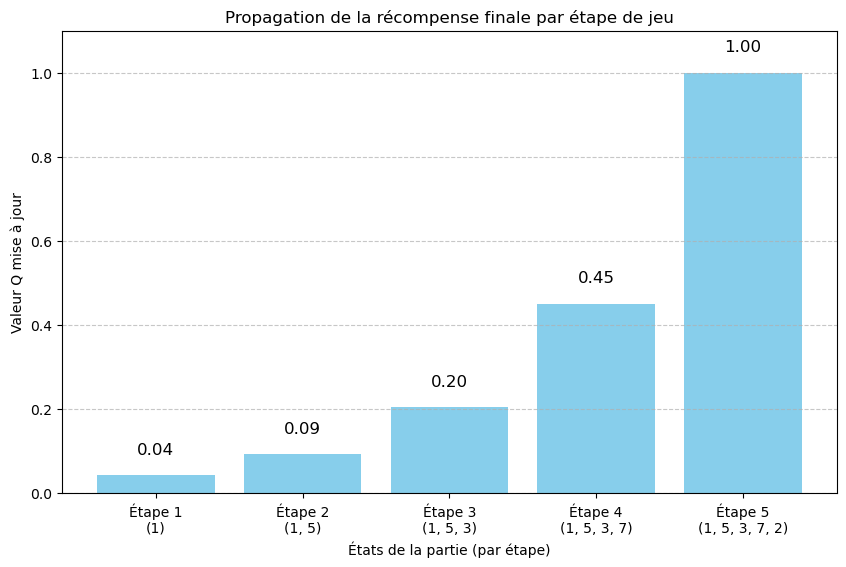

In [7]:
# Pr√©paration des donn√©es pour le trac√©
labels = [f"√âtape {i+1}\n({', '.join(map(str, etat))})" for i, etat in enumerate(etats)]
valeurs_a_tracer = [nouvelles_valeurs[tuple(etat)] for etat in etats]

# Cr√©ation du graphique
plt.figure(figsize=(10, 6))
plt.bar(labels, valeurs_a_tracer, color='skyblue')
plt.xlabel("√âtats de la partie (par √©tape)")
plt.ylabel("Valeur Q mise √† jour")
plt.title("Propagation de la r√©compense finale par √©tape de jeu")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout de la valeur sur chaque barre pour plus de clart√©
for i, v in enumerate(valeurs_a_tracer):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', color='black', fontsize=12)

plt.show()

In [8]:
def entrainement_autonome(nb_parties, strategie_j1, strategie_j2, epsilon_j1=0.1, epsilon_j2=0.1,
                         alpha_j1=0.2, alpha_j2=0.2, gamma_j1=0.9, gamma_j2=0.9,
                         afficher_partie=False, joueur1={}, joueur2={}):
    """
    Permet √† deux joueurs (IA ou al√©atoire) de s'entra√Æner en jouant l'un contre l'autre.

    Arguments:
    -----------
    nb_parties : int
        Nombre de parties √† jouer
    strategie_j1, strategie_j2 : str
        Strat√©gie des joueurs ('rl' pour Q-Learning ou 'random' pour al√©atoire)
    epsilon_j1, epsilon_j2 : float
        Taux d'exploration pour chaque joueur (d√©faut: 0.1)
    alpha_j1, alpha_j2 : float
        Taux d'apprentissage pour chaque joueur (d√©faut: 0.2)
    gamma_j1, gamma_j2 : float
        Facteur de r√©duction pour les r√©compenses √©loign√©es (d√©faut: 0.9)
    afficher_partie : bool
        Si True, affiche certaines parties pour suivre l'√©volution
    joueur1, joueur2 : dict
        Dictionnaires stockant les valeurs d'√©tats pour chaque joueur

    Retourne:
    -----------
    tuple : (victoires_j1, victoires_j2, nuls, joueur1, joueur2)
        Historique des r√©sultats et √©tats mis √† jour des joueurs
    """
    # Initialisation des listes pour suivre les r√©sultats
    victoires_j1 = []  # 1 pour victoire, 0 sinon
    victoires_j2 = []  # 1 pour victoire, 0 sinon
    matchs_nuls = []   # 1 pour match nul, 0 sinon

    # Boucle principale d'entra√Ænement
    for i in range(nb_parties):
        # Initialisation d'une nouvelle partie
        joueur_actuel = 1
        partie_en_cours = True
        jeu = Morpion()

        # Variables de suivi de la partie
        numero_coup = 1
        coups_possibles = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        etat_actuel = []
        gagnant = ''

        # Listes pour stocker les √©tats travers√©s par chaque joueur
        etats_j1 = []
        etats_j2 = []

        # Boucle d'une partie (maximum 9 coups)
        while numero_coup < 10:
            # V√©rification si la partie est termin√©e
            if gagnant in ['X', 'O']:
                # Affichage p√©riodique des parties
                if ((i+1) % 5000 == 0) and afficher_partie:
                    print(f'Partie num√©ro {i + 1}\\n')
                    jeu.afficher_plateau()
                break

            # S√©lection du coup selon la strat√©gie du joueur actuel
            if joueur_actuel == 1:
                if strategie_j1 == 'rl':
                    coup = choisir_coup(coups_possibles, etat_actuel, joueur1, epsilon_j1)
                else:  # strat√©gie al√©atoire
                    coup = np.random.choice(coups_possibles)
            else:
                if strategie_j2 == 'rl':
                    coup = choisir_coup(coups_possibles, etat_actuel, joueur2, epsilon_j2)
                else:  # strat√©gie al√©atoire
                    coup = np.random.choice(coups_possibles)

            # Jouer le coup et mettre √† jour l'√©tat du jeu
            _, coups_possibles = jeu.jouer_coup(coup, joueur_actuel)
            gagnant = jeu.verifier_gagnant()

            # Mise √† jour des √©tats
            numero_coup += 1
            etat_actuel.append(coup)
            etats_j1.append(list(etat_actuel))
            etats_j2.append(list(etat_actuel))

            # Changement de joueur
            joueur_actuel = 3 - joueur_actuel  # Alterne entre 1 et 2

        # Attribution des r√©compenses selon le r√©sultat
        if gagnant == 'O':  # Victoire J1
            joueur1 = attribuer_recompense(joueur1, etats_j1, 1, alpha_j1, gamma_j1)
            joueur2 = attribuer_recompense(joueur2, etats_j2, -1, alpha_j2, gamma_j2)
            victoires_j1.append(1)
            victoires_j2.append(0)
            matchs_nuls.append(0)
        elif gagnant == 'X':  # Victoire J2
            joueur2 = attribuer_recompense(joueur2, etats_j2, 1, alpha_j2, gamma_j2)
            joueur1 = attribuer_recompense(joueur1, etats_j1, -1, alpha_j1, gamma_j1)
            victoires_j1.append(0)
            victoires_j2.append(1)
            matchs_nuls.append(0)
        else:  # Match nul
            joueur1 = attribuer_recompense(joueur1, etats_j1, 0.5, alpha_j1, gamma_j1)
            joueur2 = attribuer_recompense(joueur2, etats_j2, 0.5, alpha_j2, gamma_j2)
            victoires_j1.append(0)
            victoires_j2.append(0)
            matchs_nuls.append(1)

    return victoires_j1, victoires_j2, matchs_nuls, joueur1, joueur2

def calculer_somme_cumulative(historique_victoires):
    """
    Calcule la somme cumulative des victoires pour visualiser la progression.

    Arguments:
    ----------
    historique_victoires : list
        Liste de 1 (victoire) et 0 (d√©faite/nul)

    Retourne:
    ----------
    tuple : (parties, somme_cumulative)
        Num√©ros des parties et somme cumulative des victoires
    """
    parties = np.arange(0, len(historique_victoires))
    somme_cumulative = []
    total = 0

    for i in range(len(parties)):
        total += historique_victoires[i]
        somme_cumulative.append(total)

    return parties + 1, np.array(somme_cumulative)

In [9]:
# Entra√Ænement autonome des joueurs sur un grand nombre de parties
# Ici, nous lan√ßons une session d'entra√Ænement o√π deux joueurs al√©atoires s'affrontent pendant 10^4 parties.

# Appel de la fonction d'entra√Ænement avec les param√®tres suivants :
# - nb_parties : Nombre total de parties √† jouer (10 000 dans ce cas)
# - strategie_j1, strategie_j2 : Strat√©gies utilis√©es par chaque joueur ('random' signifie choix al√©atoire des coups)
# - afficher_partie : Bool√©en indiquant si certaines parties doivent √™tre affich√©es pour suivre l'√©volution

# Les r√©sultats retourn√©s sont :
# - victoires_joueur_1 : Liste des victoires du joueur 1 (1 pour une victoire, 0 sinon)
# - victoires_joueur_2 : Liste des victoires du joueur 2 (1 pour une victoire, 0 sinon)
# - matchs_nuls : Liste des matchs nuls (1 pour un nul, 0 sinon)
# - joueur_1 : Dictionnaire contenant les valeurs d'√©tats mis √† jour pour le joueur 1
# - joueur_2 : Dictionnaire contenant les valeurs d'√©tats mis √† jour pour le joueur 2

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='random',
        strategie_j2='random',
        afficher_partie=True
    )

Partie num√©ro 10000\n


|     |     
  O  |  O  |  3
_____|_____|_____
     |     |     
  X  |  X  |  X
_____|_____|_____
     |     |     
  O  |  X  |  O
     |     |

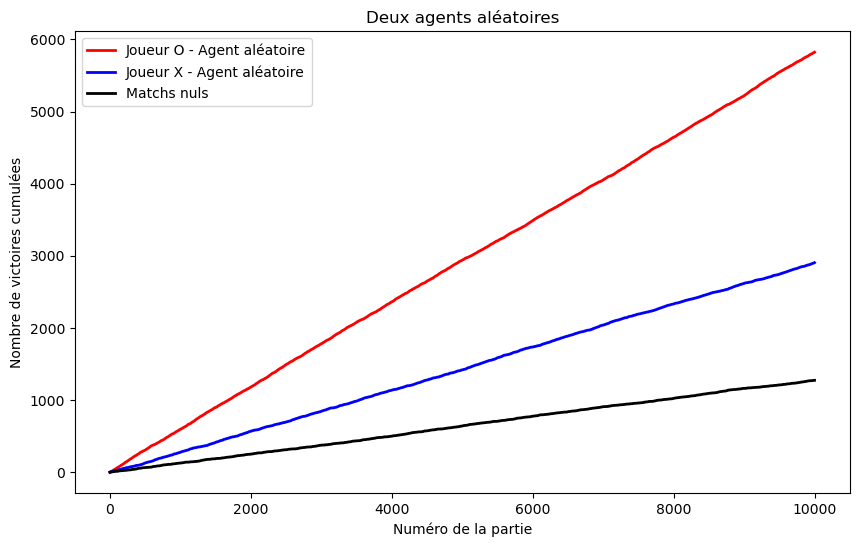

Pourcentage de victoires pour le joueur 1 (Agent al√©atoire) : 58.22 %
Pourcentage de victoires pour le joueur 2 (Agent al√©atoire) : 29.04 %
Pourcentage de matchs nuls : 12.74 %


In [10]:
# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
# Pour le joueur 2 (joueur X)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Cr√©ation d'une figure pour visualiser les r√©sultats
plt.figure(figsize=(10, 6))  # D√©finition de la taille de la figure

# Trac√© des courbes de victoires cumul√©es pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent al√©atoire'
)  # Courbe rouge pour le joueur O
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent al√©atoire'
)  # Courbe bleue pour le joueur X
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des l√©gendes
plt.title('Deux agents al√©atoires')  # Titre du graphique
plt.xlabel('Num√©ro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumul√©es')  # Label de l'axe des ordonn√©es
plt.legend()  # Affichage de la l√©gende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent al√©atoire) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent al√©atoire) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [11]:
# Entra√Ænement autonome des joueurs sur un grand nombre de parties
# Ici, nous lan√ßons une session d'entra√Ænement entre un agent al√©atoire et un agent d'apprentissage par renforcement

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='rl',
        strategie_j2='random',
        afficher_partie=True
    )

Partie num√©ro 5000\n


|     |     
  O  |  O  |  X
_____|_____|_____
     |     |     
  4  |  O  |  X
_____|_____|_____
     |     |     
  7  |  X  |  O
     |     |

Partie num√©ro 10000\n


|     |     
  O  |  2  |  3
_____|_____|_____
     |     |     
  X  |  O  |  X
_____|_____|_____
     |     |     
  7  |  8  |  O
     |     |

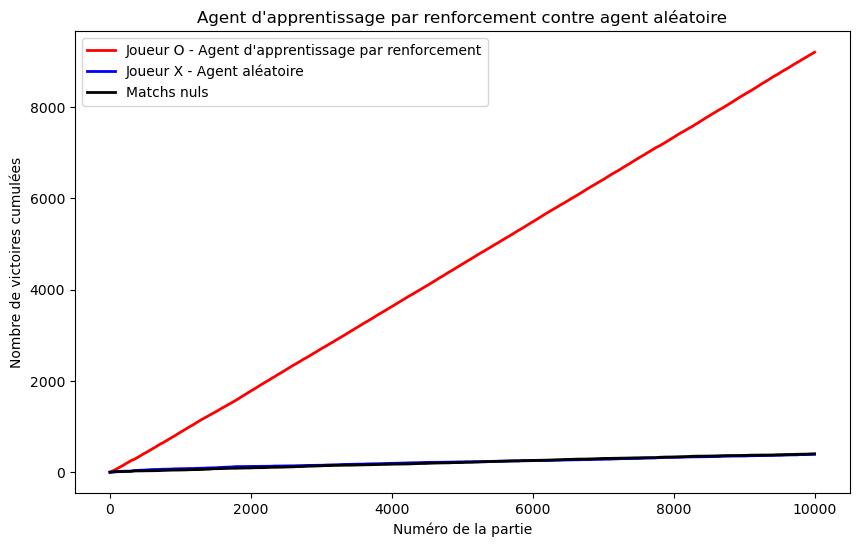

Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement) : 92.04 %
Pourcentage de victoires pour le joueur 2 (Agent al√©atoire) : 3.93 %
Pourcentage de matchs nuls : 4.03 %


In [12]:
# Tracer les r√©sultats de l'entra√Ænement

# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O - Agent d'apprentissage par renforcement)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)

# Pour le joueur 2 (joueur X - Agent al√©atoire)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)

# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Cr√©ation d'une figure pour visualiser les r√©sultats
plt.figure(figsize=(10, 6))  # D√©finition de la taille de la figure

# Trac√© des courbes de victoires cumul√©es pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent d\'apprentissage par renforcement'
)  # Courbe rouge pour le joueur O (RL agent)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent al√©atoire'
)  # Courbe bleue pour le joueur X (Random agent)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des l√©gendes
plt.title('Agent d\'apprentissage par renforcement contre agent al√©atoire')  # Titre du graphique
plt.xlabel('Num√©ro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumul√©es')  # Label de l'axe des ordonn√©es
plt.legend()  # Affichage de la l√©gende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement)
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2 (Agent al√©atoire)
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent al√©atoire) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [13]:
# Entra√Ænement autonome des joueurs sur un grand nombre de parties
# Ici, nous lan√ßons une session d'entra√Ænement entre un agent d'apprentissage par renforcement et un agent al√©atoire

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='random',
        strategie_j2='rl',
        afficher_partie=True
    )

Partie num√©ro 10000\n


|     |     
  X  |  X  |  X
_____|_____|_____
     |     |     
  X  |  O  |  O
_____|_____|_____
     |     |     
  O  |  O  |  9
     |     |

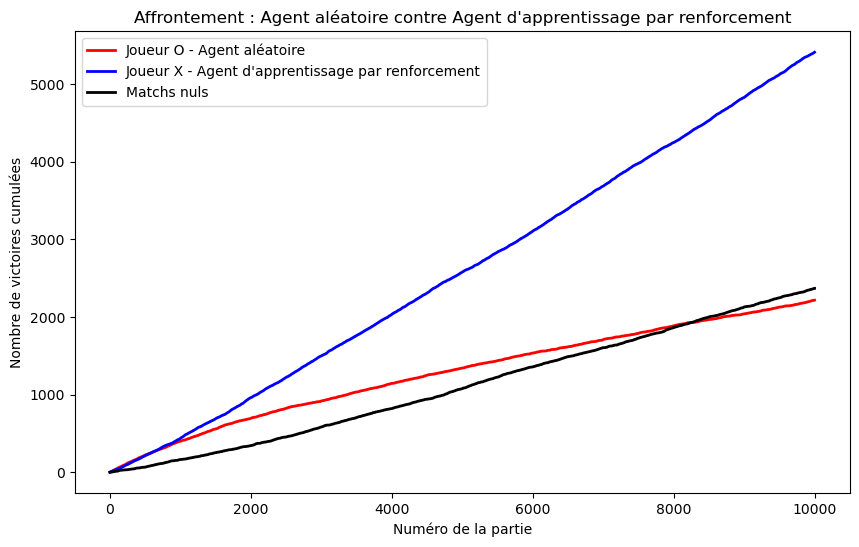

Pourcentage de victoires pour le joueur 1 (Agent al√©atoire) : 22.17 %
Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement) : 54.13 %
Pourcentage de matchs nuls : 23.7 %


In [14]:
# Tracer les r√©sultats de l'affrontement entre un agent al√©atoire et un agent d'apprentissage par renforcement

# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O - Agent al√©atoire)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)

# Pour le joueur 2 (joueur X - Agent d'apprentissage par renforcement)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)

# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Cr√©ation d'une figure pour visualiser les r√©sultats
plt.figure(figsize=(10, 6))  # D√©finition de la taille de la figure

# Trac√© des courbes de victoires cumul√©es pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent al√©atoire'
)  # Courbe rouge pour le joueur O (Agent al√©atoire)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent d\'apprentissage par renforcement'
)  # Courbe bleue pour le joueur X (RL agent)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des l√©gendes
plt.title('Affrontement : Agent al√©atoire contre Agent d\'apprentissage par renforcement')  # Titre du graphique
plt.xlabel('Num√©ro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumul√©es')  # Label de l'axe des ordonn√©es
plt.legend()  # Affichage de la l√©gende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1 (Agent al√©atoire)
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent al√©atoire) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement)
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [22]:
from morpion import Morpion
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

# Phase 1 : Entra√Ænement initial entre deux agents al√©atoires
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'random', 'random')

# Phase 2 : Entra√Ænement d'un agent RL contre un agent al√©atoire (joueur 1 est RL, joueur 2 est al√©atoire)
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'rl', 'random', joueur1=joueur_1, joueur2=joueur_2)

# Phase 3 : Entra√Ænement d'un agent al√©atoire contre un agent RL (joueur 1 est al√©atoire, joueur 2 est RL)
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'random', 'rl', joueur1=joueur_1, joueur2=joueur_2)

# Phase 4 : Entra√Ænement entre deux agents RL
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**6, 'rl', 'rl', joueur1=joueur_1, joueur2=joueur_2)

#Phase 5 : Optimisation des hyperparam√®tres
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**5,
        strategie_j1='rl',
        strategie_j2='rl',
        epsilon_j1=0.1,
        epsilon_j2=0.1,
        alpha_j1=0.1,
        alpha_j2=0.1,
        gamma_j1=0.9,
        gamma_j2=0.9,
        joueur1=joueur_1,
        joueur2=joueur_2
    )

# Initialisation d'une nouvelle partie entre un joueur humain et un agent entra√Æn√©
joueur_actuel = 1  # Le joueur 1 commence (l'agent entra√Æn√©)
partie = Morpion()  # Cr√©ation d'une instance du jeu du morpion

# Valeurs initiales pour la partie
numero_coup = 1  # Num√©ro du coup actuel
coups_possibles = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Liste des coups possibles au d√©but de la partie
etat_actuel = []  # √âtat actuel du plateau (liste des coups jou√©s)
gagnant = ''  # Variable pour stocker le nom du gagnant ('X', 'O' ou vide si pas de gagnant)

# Boucle principale de la partie
while numero_coup <= 10:  # Maximum 9 coups + 1 pour √©viter les erreurs
    clear_output(wait=True)  # Efface la sortie pr√©c√©dente pour afficher √† jour le plateau
    partie.afficher_plateau(gagnant)  # Affiche l'√©tat actuel du plateau et le gagnant (si applicable)

    # V√©rifie si la partie est termin√©e
    if gagnant == 'X':  # Si le joueur humain a gagn√©
        break
    elif gagnant == 'O':  # Si l'agent a gagn√©
        break
    if numero_coup == 10:  # Si tous les coups ont √©t√© jou√©s sans vainqueur
        break

    # Choix du coup en fonction du joueur actuel
    if joueur_actuel == 1:  # Tour de l'agent entra√Æn√©
        coup = choisir_coup(coups_possibles, etat_actuel, joueur_1, 0)  # Choix du coup selon la strat√©gie RL
        _, coups_possibles = partie.jouer_coup(coup, joueur_actuel)  # Joue le coup et met √† jour les coups possibles

    elif joueur_actuel == 2:  # Tour du joueur humain
        coup = int(input('Entrez le num√©ro de la case (1-9) : '))  # Demande au joueur humain de choisir un coup
        _, coups_possibles = partie.jouer_coup(coup, joueur_actuel)  # Joue le coup et met √† jour les coups possibles

    # V√©rifie s'il y a un gagnant apr√®s ce coup
    gagnant = partie.verifier_gagnant()

    # Incr√©mente le compteur de coups
    numero_coup += 1

    # Change de joueur
    if joueur_actuel == 1:
        joueur_actuel = 2  # Passage au joueur humain
    elif joueur_actuel == 2:
        joueur_actuel = 1  # Retour √† l'agent entra√Æn√©

|     |     
  X  |  X  |  O
_____|_____|_____
     |     |     
  X  |  O  |  6
_____|_____|_____
     |     |     
  X  |  O  |  O
     |     |

Vous avez gagn√©! üéâ